In [1]:
import pandas as pd
import sqlite3


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from IPython.display import clear_output

In [4]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("./clientes.db")
df = pd.read_sql_query("SELECT * from player", con)

In [6]:
def map_float(x):
    return float(x)
df.head(100)
df["mlt"] = df["mlt"].map(map_float)

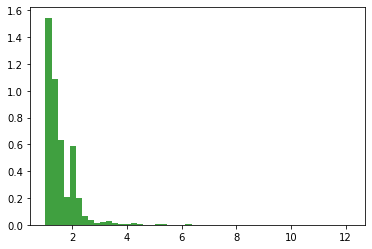

In [7]:
n, bins, patches = plt.hist(df[df["mlt"]  >0]["mlt"], 50, density=True, facecolor='g', alpha=0.75)

In [186]:

df_tempo = pd.read_sql_query("SELECT * from tempo", con)
df_tempo.tail()

,id,tempo
1330,1331,6.36
1331,1332,1.95
1332,1333,1.16
1333,1334,2.84
1334,1335,4.68


In [9]:
df_tempo["tempo"] = df_tempo["tempo"].map(map_float)

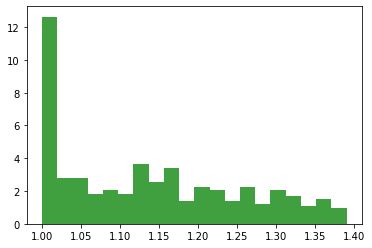

In [10]:
n, bins, patches = plt.hist(df_tempo[df_tempo["tempo"]<1.4]["tempo"], 20, density=True, facecolor='g', alpha=0.75)

In [11]:
len(df_tempo[df_tempo["tempo"] <= 1.5]["tempo"])/len(df_tempo[df_tempo["tempo"] >= 1.5]["tempo"])

0.7574123989218329

In [12]:
len(df_tempo[df_tempo["tempo"] <= 1.4]["tempo"])/len(df_tempo["tempo"])

0.37915057915057915

In [13]:
# 1- 1.4, 1.4-2.1, 2-1

In [14]:
df_tempo["tempo_atra"]  = df_tempo["tempo"].shift(-1)

In [15]:
df_tempo = df_tempo.dropna()
df_tempo
tm_df_tempo = len(df_tempo)

In [16]:
def map_categoria(x):
    r_casa = x >= 1 and x  < 1.4
    r_dinheiro = x >= 1.4 and x <2.3
    r_ganancia = x >= 2.3
    
    if r_casa:
        return "casa"
    elif r_dinheiro:
        return "ganhando"
    elif r_ganancia:
        return "ganancia"
    
    

In [17]:
df_tempo["tempo_c"] = df_tempo["tempo"].map(map_categoria)
df_tempo["tempo_atra_c"] = df_tempo["tempo_atra"].map(map_categoria)

In [18]:
def pega_sequencia(df_tempo, c_preview, c_seguinte):
    r_tempo_c = df_tempo["tempo_c"] == c_preview
    r_tempo_atra_c = df_tempo["tempo_atra_c"] == c_seguinte


    return len(df_tempo[r_tempo_c & r_tempo_atra_c])/len(df_tempo["tempo_c"]) *100
    

In [19]:
d_saida = {}
d_saida["g-ga"] = pega_sequencia(df_tempo,'ganancia','ganancia')
d_saida["g-c"] = pega_sequencia(df_tempo,'ganancia','casa')
d_saida["g-d"] = pega_sequencia(df_tempo,'ganancia','ganhando')

d_saida["c-c"] = pega_sequencia(df_tempo,'casa','casa')
d_saida["c-ga"] = pega_sequencia(df_tempo,'casa','ganancia')
d_saida["c-d"] = pega_sequencia(df_tempo,'casa','ganhando')


d_saida["d-d"] = pega_sequencia(df_tempo,'ganhando','ganhando')
d_saida["d-ga"] = pega_sequencia(df_tempo,'ganhando','ganancia')
d_saida["d-c"] = pega_sequencia(df_tempo,'ganhando','casa')


print(5*"***--")
print("***--GANANCIA")
print(f"ganancia --> ganancia {d_saida['g-ga']}%")
print(f"ganancia --> casa {d_saida['g-c']}%")
print(f"ganancia --> ganhando {d_saida['g-d']}%")
print(5*"***--")


print("***--CASA")
print(f"casa --> casa {d_saida['c-c']}%")
print(f"casa --> ganhando {d_saida['c-d']}%")
print(f"casa --> ganancia {d_saida['g-ga']}%")
print(5*"***--")

print("***--GANHANDO")
print(f"ganhando --> ganhando {d_saida['d-d']}%")
print(f"ganhando --> casa {d_saida['d-ga']}%")
print(f"ganhando --> ganancia {d_saida['d-c']}%")
print(5*"***--")


***--***--***--***--***--
***--GANANCIA
ganancia --> ganancia 15.765069551777433%
ganancia --> casa 14.219474497681608%
ganancia --> ganhando 9.582689335394127%
***--***--***--***--***--
***--CASA
casa --> casa 12.442040185471406%
casa --> ganhando 8.887171561051005%
casa --> ganancia 15.765069551777433%
***--***--***--***--***--
***--GANHANDO
ganhando --> ganhando 5.023183925811438%
ganhando --> casa 8.114374034003092%
ganhando --> ganancia 10.35548686244204%
***--***--***--***--***--


In [20]:
print(f"ganancia {(d_saida['g-ga']+ d_saida['g-d'])/(d_saida['g-ga']+ d_saida['g-c'] + d_saida['g-d'])}")
print(f'casa {(d_saida["c-ga"]+ d_saida["c-d"])/(d_saida["c-ga"]+ d_saida["c-c"] + d_saida["c-d"])}')
print(f'dinheiro {(d_saida["d-ga"]+ d_saida["d-d"])/(d_saida["d-ga"]+ d_saida["d-c"] + d_saida["d-d"])}')


ganancia 0.6406249999999999
casa 0.6631799163179917
dinheiro 0.5592105263157895


# Aqui começa o testador de estrategias

In [21]:
import time

In [22]:
# def get_last_resultado():
#     query ="""
#     SELECT * 
#         FROM    tempo
#         WHERE   id = (SELECT MAX(id)  FROM tempo);
#     """
#     # con = sqlite3.connect("./clientes.db")
#     cur = con.cursor()
#     cur.execute(query)

#     rows = cur.fetchall()
#     return float(rows[0][1])

# for row in rows:
#     print(row)

In [161]:
# def get_last_resultado():
def gera_valores():
    for label, row in df_tempo.iterrows():
        yield float(row["tempo"])
get_last_resultado = gera_valores()
novo_valor = next( get_last_resultado)


In [169]:
next( get_last_resultado)

1.14

In [160]:
get_last_resultado()

TypeError: 'float' object is not callable

In [79]:
# def gera_valores():
#     fim = True
#     while fim:
#         for label, row in df_tempo.iterrows():
#             yield row["tempo"]
#         fim = False

In [93]:
next(get_last_resultado)

TypeError: 'function' object is not an iterator

In [87]:
for label, row in df_tempo.iterrows():
    print(row["tempo"])

2.99
20.39
1.83
2.5
1.47
69.91
1.55
1.63
1.14
1.69
1.31
1.0
3.76
1.15
1.2
1.05
2.07
1.87
4.4
1.31
1.0
2.19
1.04
1.58
1.33
1.0
1.35
1.89
2.55
1.0
1.91
1.32
1.14
1.82
1.12
2.42
1.46
1.0
1.4
1.05
3.76
2.07
7.92
3.3
1.91
1.8
1.47
20.33
1.09
2.26
1.78
1.55
1.0
2.81
62.14
1.52
1.73
17.04
2.52
24.15
6.62
1.75
10.68
1.27
86.47
1.42
1.03
2.07
6.06
1.24
2.93
1.22
1.4
1.66
1.0
1.24
1.01
1.27
1.76
1.0
1.12
1.0
48.94
1.05
1.76
1.02
3.72
2.31
4.68
1.42
1.0
1.03
1.42
2.47
1.6
1.1
3.24
2.22
4.77
1.87
1.49
1.03
5.22
2.55
4.4
3.2
4.82
3.43
2.99
2.03
5.7
2.7
1.03
1.0
1.82
1.58
1.09
2.55
2.7
1.39
6.06
4.82
1.46
1.28
1.26
6.69
7.61
1.4
1.75
34.55
2.96
20.8
5.76
1.21
2.03
1.0
1.13
1.17
29.46
9.86
1.0
1.95
9.86
2.96
1.53
1.26
1.02
1.0
1.93
6.3
2.52
3.61
1.75
2.26
1.03
10.36
1.61
2.79
3.08
16.22
8.16
1.1
2.01
1.26
2.79
1.09
2.68
1.0
1.75
1.0
1.07
4.36
2.79
1.24
1.09
1.78
1.32
1.68
1.56
1.33
1.42
1.23
4.15
1.13
5.94
3.08
1.46
7.92
2.84
1.3
1.43
6.56
1.22
1.16
1.73
2.5
2.6
9.2
6.3
2.42
2.45
1.0
22.46
1.2
3.5
1.

In [24]:
# def get_last_resultado():
# df_tempo.["tempo"]

In [25]:
montante_inicial = 200
qnt_aposta = 3
lis_montante = []

In [26]:
# antiga
# def estrategia(x):
#     categoria = map_categoria(x)
#     r_casa = categoria == "casa"
#     r_dinheiro = categoria == "ganhando"
#     r_ganancia = categoria == "ganancia"

#     if r_casa:
#         return 1.6 + np.random.uniform(-2,2)*0.1
#     if  r_ganancia:
#         return 1.6 + np.random.uniform(-2,2)*0.1
#     elif r_dinheiro:
#         return 0
#     else:
#         return 0

In [27]:
class estrategia_mock():
    def __init__(self, montante_inicial, estrategia, nome, qnt_aposta=3):
        self.montante_inicial= montante_inicial
        self.montante_atualizado = montante_inicial
        self.estrategia = estrategia
        self.qnt_aposta = qnt_aposta
        self.guarda_produtividade = []
        self.nome = nome
        
    def atualiza_montante(self, novo_valor_tempo):
#         self.last_aposta = novo_valor_tempo
        if novo_valor_tempo > self.t_aposta:
            self.montante_atualizado = self.montante_atualizado + (self.qnt_aposta * self.t_aposta)
        else:
            self.montante_atualizado  = self.montante_atualizado  - self.qnt_aposta
        self.guarda_produtividade.append(self.montante_atualizado - self.montante_inicial)
    
    def atualiza_imagem_ganhos(self):
        plt.plot(self.guarda_produtividade, label=self.nome)

    
    def faz_aposta(self, valor_tempo_passado, i=0):
        self.t_aposta = self.estrategia(valor_tempo_passado)
#         printmd(f"A {self.nome}, apostou o valor de **{self.t_aposta}x**, tem um montante de {self.montante_atualizado}TC na i:{i}; t ultima {valor_tempo_passado}x")

        return self.t_aposta

In [28]:
# def map_categoria(x):
#     r_casa = x >= 1 and x  < 1.4
#     r_dinheiro = x >= 1.4 and x <2.3
#     r_ganancia = x >= 2.3
    
#     if r_casa:
#         return "casa"
#     elif r_dinheiro:
#         return "ganhando"
#     elif r_ganancia:
#         return "ganancia"
    

In [29]:
def estrategia_v0(x):
    def map_categoria(x):
        r_casa = x >= 1 and x  < 1.4
        r_dinheiro = x >= 1.4 and x <2.3
        r_ganancia = x >= 2.3

        if r_casa:
            return "casa"
        elif r_dinheiro:
            return "ganhando"
        elif r_ganancia:
            return "ganancia"
        
    categoria = map_categoria(x)
    r_casa = categoria == "casa"
    r_dinheiro = categoria == "ganhando"
    r_ganancia = categoria == "ganancia"

    if r_casa:
        return 1.3 + np.random.uniform(0,3)*0.1
    if  r_ganancia:
        return 1.6 + np.random.uniform(0,4)*0.1
    elif r_dinheiro:
        return 0
    else:
        return 0

In [30]:
def estrategia_v1(x):
    def map_categoria(x):
        r_casa = x >= 1 and x  < 1.4
        r_dinheiro = x >= 1.4 and x <2.3
        r_ganancia = x >= 2.3

        if r_casa:
            return "casa"
        elif r_dinheiro:
            return "ganhando"
        elif r_ganancia:
            return "ganancia"
    
    categoria = map_categoria(x)
    r_casa = categoria == "casa"
    r_dinheiro = categoria == "ganhando"
    r_ganancia = categoria == "ganancia"

    if r_casa:
        return 1.3 + np.random.uniform(0,3)*0.1
    if  r_ganancia:
        return 1.6 + np.random.uniform(0,4)*0.1
    elif r_dinheiro:
        return 0
    else:
        return 0

In [31]:
def estrategia_v2(x):
    def map_categoria(x):
        r_casa = x >= 1 and x  < 1.4
        r_dinheiro = x >= 1.4 and x <2.3
        r_ganancia = x >= 2.3

        if r_casa:
            return "casa"
        elif r_dinheiro:
            return "ganhando"
        elif r_ganancia:
            return "ganancia"
    
    categoria = map_categoria(x)
    r_casa = categoria == "casa"
    r_dinheiro = categoria == "ganhando"
    r_ganancia = categoria == "ganancia"

    if r_casa:
        return 1.6 + np.random.uniform(0,4)*0.1
    if  r_ganancia:
        return 1.6 + np.random.uniform(0,4)*0.1
    elif r_dinheiro:
        return 0
    else:
        return 0

In [32]:
def estrategia_v3(x):
    categoria = map_categoria(x)
    r_casa = categoria == "casa"
    r_dinheiro = categoria == "ganhando"
    r_ganancia = categoria == "ganancia"

    if r_casa:
        return 0 #1.1 + np.random.uniform(-1,3)*0.1
    if  r_ganancia:
        return 2 + np.random.uniform(0,4)*0.1
    elif r_dinheiro:
        return 0

In [189]:
e0 = estrategia_mock(50, estrategia_v0, "estrategia_v0", qnt_aposta = 1)
e1 = estrategia_mock(50, estrategia_v1, "estrategia_v1", qnt_aposta = 1)
e2 = estrategia_mock(50, estrategia_v2, "estrategia_v2", qnt_aposta = 1)
e3 = estrategia_mock(50, estrategia_v3, "estrategia_v3", qnt_aposta = 1)

In [175]:
# lista_estrategia = [e0, e1, e2, e3]
# last_t_valor = next( get_last_resultado)

# for i in range(300):
#     r_valor_novo_t = True
    
#     # criando novas apostas
#     for estrategia_c in lista_estrategia:
#         estrategia_c.faz_aposta(last_t_valor,i)
    
#     while(r_valor_novo_t):
# #         time.sleep(0.3)
#         novo_t_valor = next( get_last_resultado)
#         r_veio_diferente = novo_t_valor != last_t_valor
#         if r_veio_diferente:
#             r_valor_novo_t = False
#             last_t_valor = novo_t_valor

#             #atualizando
#             for estrategia_c in lista_estrategia:
#                 estrategia_c.atualiza_montante(novo_t_valor)
                    
#             clear_output(wait=True)
#             for estrategia_c in lista_estrategia:
#                 estrategia_c.atualiza_imagem_ganhos()
            
#             plt.legend()
#             plt.show()
                
                
                
            

In [178]:
def testador_apostador(lista_estrategia, qnt_apostas):
    def gera_valores():
        for label, row in df_tempo.iterrows():
            yield float(row["tempo"])
    get_last_resultado = gera_valores()
    novo_valor = next( get_last_resultado)

    last_t_valor = next( get_last_resultado)

    for i in range(qnt_apostas):
        r_valor_novo_t = True

        # criando novas apostas
        for estrategia_c in lista_estrategia:
            estrategia_c.faz_aposta(last_t_valor,i)

        while(r_valor_novo_t):
    #         time.sleep(0.3)
            novo_t_valor = next( get_last_resultado)
            r_veio_diferente = novo_t_valor != last_t_valor
            if r_veio_diferente:
                r_valor_novo_t = False
                last_t_valor = novo_t_valor

                #atualizando
                for estrategia_c in lista_estrategia:
                    estrategia_c.atualiza_montante(novo_t_valor)

                clear_output(wait=True)

    for estrategia_c in lista_estrategia:
        estrategia_c.atualiza_imagem_ganhos()

    plt.legend()
    plt.show()



In [190]:
testador_apostador([e0, e1, e2, e3], 1000)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [187]:
len(df_tempo)

1335

In [ ]:
# last_aposta = get_last_resultado()
# r_valor_while = True
# for i in range(150):
#     r_valor_while = True
#     t_aposta = estrategia(last_aposta)
#     print(f"{i} - apostou o valor de {t_aposta}, o tempo da ultima {last_aposta}, tendo um montante de {montante_inicial} ")
# #     print(last_aposta)
    
   
#     while(r_valor_while):
#         time.sleep(0.3)
        
#         novo_valor = get_last_resultado()
#         r_novo_valor = novo_valor != last_aposta
# #         print(r_novo_valor)
#         if r_novo_valor:
#             r_valor_while = False
#             last_aposta = novo_valor

#             if novo_valor > t_aposta:
#                 montante_inicial = montante_inicial + qnt_aposta * t_aposta
#             else:
#                 montante_inicial = montante_inicial - qnt_aposta
#             lis_montante.append(montante_inicial - 200)
#             clear_output(wait=True)
#             plt.plot(lis_montante)
#             plt.show()
# #             print(montante_inicial)

